



# Tais conjuntos de dados são públicos e foram publicados no Kaggle. 

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Perguntas - Obesity among adults by country, 1975-2016

In [64]:
df_obesity = pd.read_csv("obesity-cleaned.csv")


- Limpe os dados do DataFrame, criando uma coluna de nome 'Obesity' que conterá os valores de obesidade. Transforme em float as colunas que porventura foram importadas como string.

In [65]:
del df_obesity['Unnamed: 0']

In [66]:
df_obesity['Obesity'] = df_obesity['Obesity (%)'].apply(lambda x: x.split(' ')[0])
df_obesity.loc[df_obesity['Obesity'] == 'No', 'Obesity'] = np.nan
df_obesity.dropna(inplace=True)


In [67]:
df_obesity['Year'] = df_obesity['Year'].astype(float)
df_obesity['Obesity'] = df_obesity['Obesity'].astype(float)

- Qual o percentual médio de obesidade por sexo no mundo no ano de 2015?

In [68]:
df_obesity[df_obesity['Year'] == 2015].groupby('Sex')['Obesity'].mean()
# pivot_table_result = df_obesity[df_obesity['Year'] == 2015].pivot_table(values='Obesity', index='Sex', aggfunc='mean')
# pivot_table_result


Sex
Both sexes    19.508377
Female        22.899476
Male          15.980628
Name: Obesity, dtype: float64

- Quais são os 5 países com a maior e a menor taxa de aumento nos índices de obesidade no período observado?

In [69]:
df_obesity_year_index = df_obesity.copy()
df_obesity_year_index.set_index('Year', inplace=True)

df_obesity_start = df_obesity_year_index[df_obesity_year_index.index == 1975]
df_obesity_end = df_obesity_year_index[df_obesity_year_index.index == 2016]

df_obesity_start.set_index("Country", inplace=True)
df_obesity_end.set_index("Country", inplace=True)



df_obesity_ev = df_obesity_end[df_obesity_end["Sex"] == "Both sexes"]["Obesity"] - df_obesity_start[df_obesity_start["Sex"] == "Both sexes"]["Obesity"]
df_obesity_ev.sort_values(inplace=True)
df_obesity_ev.head()

Country
Viet Nam       2.0
Singapore      3.1
Japan          3.3
Bangladesh     3.4
Timor-Leste    3.6
Name: Obesity, dtype: float64

In [70]:
df_obesity_ev.tail()


Country
Cook Islands    27.9
Tonga           28.3
Kiribati        30.1
Niue            31.1
Tuvalu          33.7
Name: Obesity, dtype: float64

- Quais os países com maiores e menores níveis percetuais de obesidade em 2015?

In [71]:
df_obesity_2015 = df_obesity_year_index[df_obesity_year_index.index == 2015]
df_obesity_2015[df_obesity_2015['Obesity'] == df_obesity_2015['Obesity'].max()]

,Country,Obesity (%),Sex,Obesity
Year,,,,
2015.0,Nauru,63.1 [55.5-70.3],Female,63.1


In [72]:
df_obesity_2015[df_obesity_2015['Obesity'] == df_obesity_2015['Obesity'].min()]

,Country,Obesity (%),Sex,Obesity
Year,,,,
2015.0,Viet Nam,1.5 [0.8-2.5],Male,1.5


- Qual a diferença média percentual de obesidade entre sexos ao longo dos anos para o Brasil?

In [73]:
df_ob_brasil = df_obesity[df_obesity['Country'] == 'Brazil'].set_index('Year')
abs(df_ob_brasil[df_ob_brasil['Sex'] == 'Male']['Obesity'] - df_ob_brasil[df_ob_brasil['Sex'] == 'Female']['Obesity'])  


Year
1975.0    4.3
1976.0    4.4
1977.0    4.6
1978.0    4.7
1979.0    4.9
1980.0    4.9
1981.0    5.1
1982.0    5.2
1983.0    5.4
1984.0    5.5
1985.0    5.6
1986.0    5.7
1987.0    5.8
1988.0    5.9
1989.0    6.0
1990.0    6.1
1991.0    6.1
1992.0    6.3
1993.0    6.3
1994.0    6.4
1995.0    6.4
1996.0    6.5
1997.0    6.6
1998.0    6.7
1999.0    6.8
2000.0    6.8
2001.0    6.8
2002.0    6.8
2003.0    6.9
2004.0    6.9
2005.0    6.9
2006.0    6.9
2007.0    7.0
2008.0    6.9
2009.0    7.0
2010.0    7.0
2011.0    6.9
2012.0    6.9
2013.0    6.9
2014.0    6.9
2015.0    6.9
2016.0    6.9
Name: Obesity, dtype: float64

- Você conseguiria plotar um gráfico mostrando a evolução da obesidade para ambos sexos no mundo?

<Axes: xlabel='Year'>

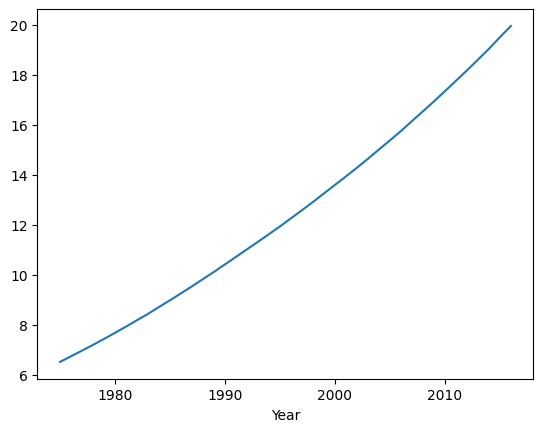

In [74]:
df_both = df_obesity[df_obesity["Sex"] == "Both sexes"]
df_both = df_both.groupby('Year')['Obesity'].mean()
df_both.plot()

## Perguntas - GDP Per Person (1901-2011)

In [75]:
df_gdp = pd.read_csv("GDP.csv", decimal=".")
df_gdp.head(50)

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1921,662.40
5,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1926,677.87
6,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1931,693.71
7,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1936,709.91
8,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1941,726.49
9,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1946,743.46


- Limpe o conjunto de dados, convertendo strings em datas ou float, quando necessário.

In [76]:
df_gdp['Year'] = pd.to_datetime(df_gdp['Year'], format="%d/%m/%Y")
df_gdp["gdp_pp"] = df_gdp[" GDP_pp "].apply(lambda x: float(x.split(" ")[1].replace(",", "")))
del df_gdp[' GDP_pp ']

- Você conseguiria informar o primeiro valor registrado de cada país?

In [77]:
first_ocorrency = df_gdp.groupby("Country")["Year"].min()

In [78]:
df_gdp.groupby("Country").min()["Year"][df_gdp.groupby("Country").min()["Year"].dt.year == 1991]

Country
Kosovo   1991-01-01
Name: Year, dtype: datetime64[ns]

- Informe as regiões com maiores crescimentos de PIB per capita no século passado.

In [79]:
df_gdp[df_gdp['Year'].dt.year < 2000]['Year'].max()

df_gdp_start = df_gdp[df_gdp['Year'].dt.year == 1901]
df_gdp_end = df_gdp[df_gdp['Year'].dt.year == 1996]

(((df_gdp_end.groupby('Region')['gdp_pp'].mean() / df_gdp_start.groupby('Region')['gdp_pp'].mean()) - 1) * 100).sort_values(ascending=False)



Region
Middle East, North Africa, and Greater Arabia    857.215950
Asia                                             711.761516
Europe                                           594.046167
North America                                    589.760175
Central America and the Caribbean                406.426789
Australia and Oceania                            396.075383
South America                                    312.123735
Sub-Saharan Africa                               248.633780
Name: gdp_pp, dtype: float64